In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional,Flatten,TimeDistributed,ConvLSTM2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from datetime import datetime
import sys

from read_files import read_files

import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

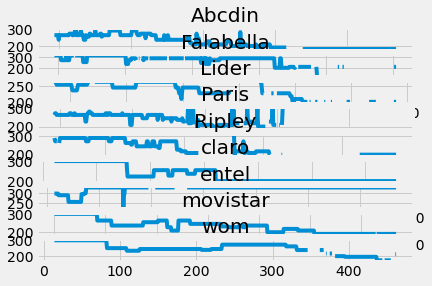

In [3]:
path = "C:/Users/Vasco/OneDrive - Universidade de Aveiro/Grupo/AIA/" #o teu path
path = "C:/Users/Vasco Costa/OneDrive - Universidade de Aveiro/Grupo/AIA/" #o teu path
path = "C:\\Users\\Tiago\\Universidade de Aveiro\Vasco Costa - AIA\\"

product_group_id = 23 #depende da pasta
time_series_folder = 1 #1,2,3

df_long, df_wide = read_files(path,product_group_id,time_series_folder)
product_information = pd.read_pickle(path+"Data/product_information")


i = 1
plt.figure()
for col in df_wide.columns:
    plt.subplot(len(df_wide.columns), 1, i)
    plt.plot(df_wide[col].values)
    plt.title(col)
    i += 1
plt.show()

In [4]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

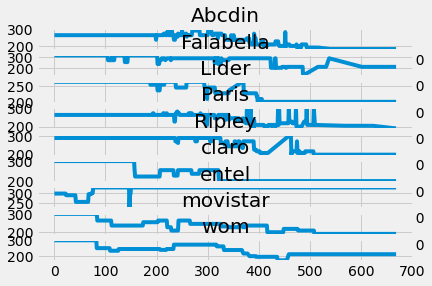

In [5]:
methods= ["linear","time","slinear","quadratic","cubic","barycentric",
        "krogh", "from_derivatives", "pchip", "akima", "cubicspline"]
orders = ["polynomial","spline"]
methods += orders
order = 5

method = methods[2]
#for name in df_wide.columns:
if method in orders:
    df_wide.interpolate(option=method,order=order,inplace=True,limit_direction="both")
else:
    df_wide.interpolate(option=method,inplace=True,limit_direction="both")

i = 1
plt.figure()
for col in df_wide.columns:
    plt.subplot(len(df_wide.columns), 1, i)
    plt.plot(df_wide[col].values)
    plt.title(col)
    i += 1
plt.show()

In [6]:
company = "Abcdin"
raw_seq = df_wide[company]
percent_train = 0.7
value = int(len(raw_seq)*percent_train)


X_train = df_wide[:value]
X_test = df_wide[value:]

SARIMA

In [7]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [8]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)





In [9]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [22]:
raw_avg = raw_seq.resample('MS').mean()


23


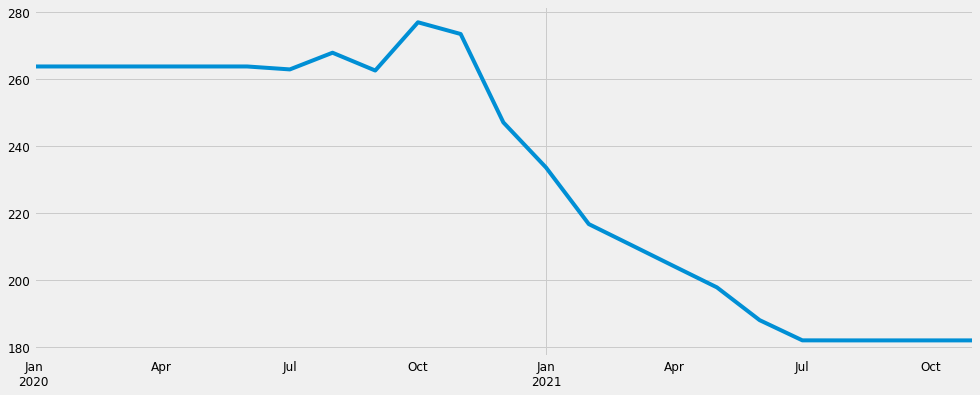

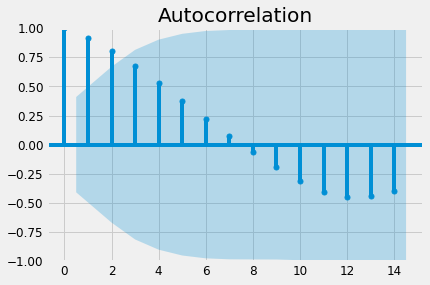

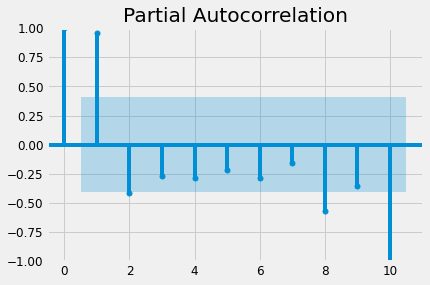

In [11]:
raw_avg.plot(figsize=(15, 6))
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(raw_avg)
matplotlib.pyplot.show()
plot_pacf(raw_avg, lags=10)
matplotlib.pyplot.show()



In [12]:
#apply adf test on the series
print(adf_test(raw_avg))
print(kpss_test(raw_avg))

Results of Dickey-Fuller Test:
Test Statistic                 -0.509279
p-value                         0.890193
#Lags Used                      1.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64
None
Results of KPSS Test:
Test Statistic           0.593037
p-value                  0.023269
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


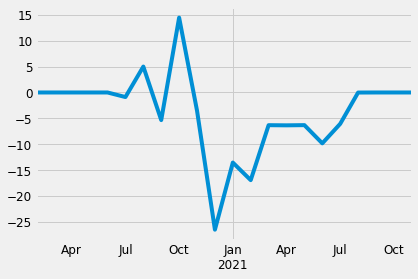

In [13]:
raw_adj = raw_avg - raw_avg.shift(1)
raw_adj = raw_adj.dropna()
raw_adj.plot()
plt.savefig("sarima_"+company+"_dados_novos.png",dpi=100)

In [14]:
print(adf_test(raw_adj))

Results of Dickey-Fuller Test:
Test Statistic                 -2.385932
p-value                         0.145746
#Lags Used                      9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64
None


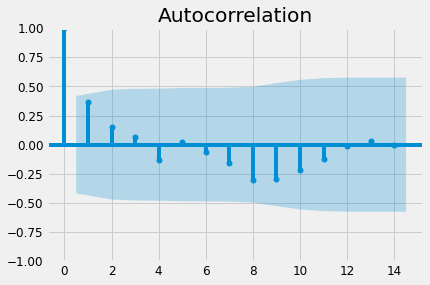

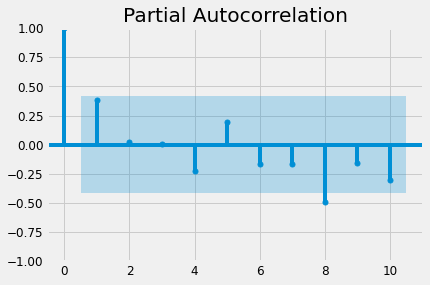

In [15]:

# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(raw_adj)
plt.savefig("sarima_"+company+"_acf.png",dpi=100)
matplotlib.pyplot.show()
plot_pacf(raw_adj, lags = 10)
plt.savefig("sarima_"+company+"_pacf.png",dpi=100)
matplotlib.pyplot.show()

In [16]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(raw_adj,
                                order=(0, 1, 1),
                                seasonal_order=(2, 1, 0, 4))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 2.875807
         Iterations: 5
         Function evaluations: 260
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6163      0.317     -1.943      0.052      -1.238       0.005
ar.S.L4       -0.9126      0.185     -4.945      0.000      -1.274      -0.551
ar.S.L8       -0.8093      0.141     -5.759      0.000      -1.085      -0.534
sigma2        54.0374     35.420      1.526      0.127     -15.385     123.460


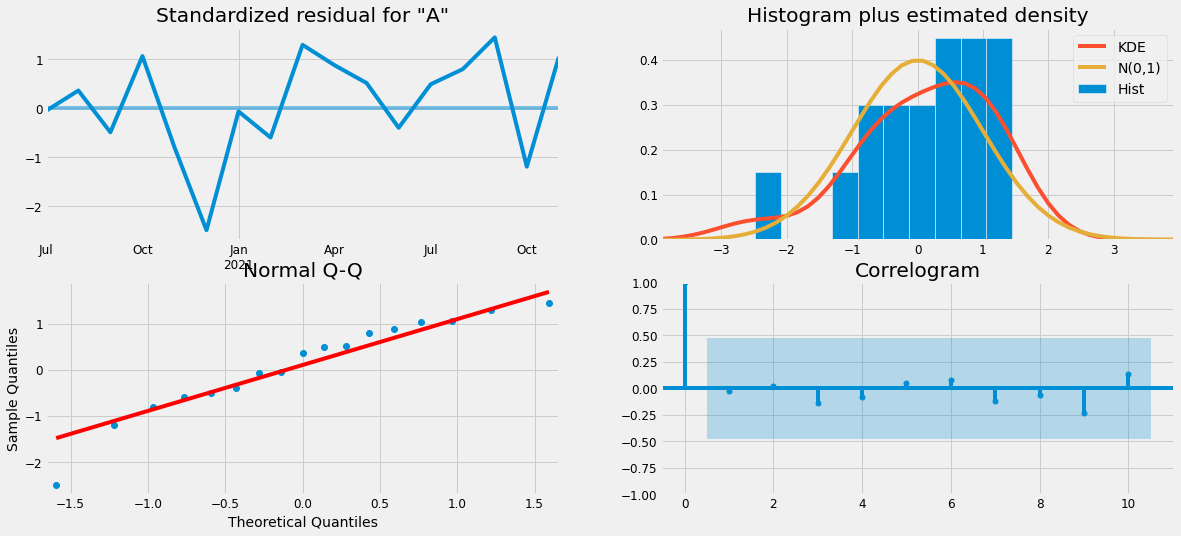

In [17]:
results.plot_diagnostics(figsize=(18, 8))
plt.savefig("sarima_"+company+"_diagnostico.png",dpi=100)
plt.show()

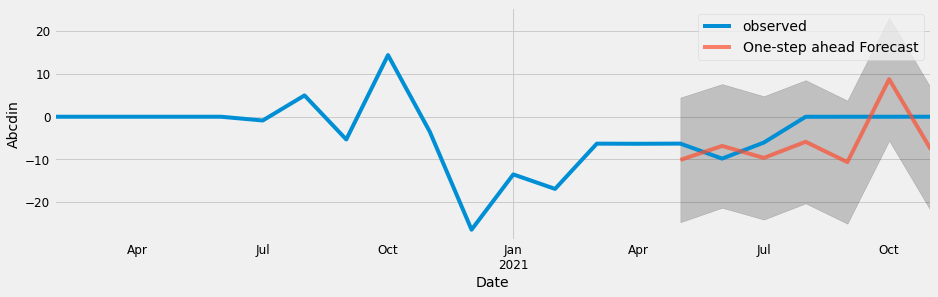

In [18]:
pred = results.get_prediction(start=round(len(raw_adj)*0.7), dynamic=False)
pred_ci = pred.conf_int()
ax = raw_adj.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel(company)
plt.legend()
plt.savefig("sarima_"+company+"_previsao.png",dpi=100)
plt.show()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = raw_adj['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
mae = (y_forecasted - y_truth).mean()
print('MAE is {}'.format(round(mae,5)))
print('The Mean Squared Error is {}'.format(round(mse, 5)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 5)))


#https://github.com/aggpranshu53/MLAlgorithms/blob/master/Time%20Series%20Analysis.ipynb

MAE is -2.82889
The Mean Squared Error is 45.57433
The Root Mean Squared Error is 6.75088
